# Advanced Machine Learning Project-Diabetes

-------------------------------------------------------

# Sepideh Khalafi


--------------------------------------

## About Dataset

This dataset has been gathered over ten years in the USA different hospitals. It contains different measurements about diabetic paitients and their diagnostic. ([UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008), 2022)

"The data is submitted on behalf of the Center for Clinical and Translational Research, Virginia Commonwealth University, a recipient of NIH CTSA grant UL1 TR00058 and a recipient of the CERNER data. John Clore (jclore '@' vcu.edu), Krzysztof J. Cios (kcios '@' vcu.edu), Jon DeShazo (jpdeshazo '@' vcu.edu), and Beata Strack (strackb '@' vcu.edu). This data is a de-identified abstract of the Health Facts database (Cerner Corporation, Kansas City, MO)." ([UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008), 2022)


-----------------------

## The problem

All the patients have been diagnosed with diabetes. Impact of HbA1c measurement on hospital readmission rates. We are going to find a suitable machine learning model, based on these measurments, to identify if a patient is going to be readmitted to the hospital **less than 30 days after leaving**, **over 30 days or more** or **not readmitted** based on the target label, to identify patients in need of more attention. It is a multi calss classification task since we have a target lable of three. 

-----------------------------------------
## Importing Libraries

- **pandas** is used to upload and manipulate our dataframe. 
- **sklearn.model_selection** is used for splitting the data. Also for finding the optimum model using *GridSearchCV()*
- **matplotlib** and **seaborn** are for visualization purposes.
- **sklearn.compose** is used for one hot encoding purpose on categorical features.
- **imblearn.under_sampling** is used to balance the data
- **sklearn.ensemble**, **sklearn.neural_network**, **sklearn.linear_model**, and **keras** are used for modeling.

While running this cell a warning pops up because of the GPU settings. 

In [2]:
import pandas

import sklearn.model_selection
import sklearn.compose  
import sklearn.ensemble   
import sklearn.neural_network  
import sklearn.linear_model  
import imblearn.under_sampling

import keras.models
import keras.layers

import matplotlib
import seaborn

-----------------------------------------


## Data Collection

With **read_csv()** we can load the excel file containing the dataset. Using **head()** I could see the first five rows of the dataset and here I set the option of showing maximum number of columns to see all of them. We could also just use a method to print out the name of the columns for that reason.

The target label (y) will be the column *readmitted* and the rest of the features would be the (x) which we define after preprocessing.

We split the data to train and test to avoid *data leakage*. The size of the split is by default 25% for the test set, I defined it to be 20%.

**Due to many limitations caused by our large dataset and limited capacity of hardware and software, I had no choice but to take a sample of my dataset and work with that. While rerunning the pipeline, rows used will change, since this is not a fixed sample. Defining the size of the sample was determined by trial. The final fraction is 25% of the original dataset. To have samples of all ages represented, I grouped the datset on *age* and then took a sample of it.**

In [3]:
pandas.set_option('display.max_columns', None)
diabetes = pandas.read_csv("teaching/datasets/my_datasets/diabetic_data.csv")

diabetes = diabetes.groupby(by = "age").sample(frac = 0.25)

train, test = sklearn.model_selection.train_test_split(diabetes, test_size = 0.2)

print("shape of the whole dateset is: ", diabetes.shape)
print("shape of the train is: ", train.shape)
print("shape of the test is: ", test.shape)
train.head()

shape of the whole dateset is:  (25441, 50)
shape of the train is:  (20352, 50)
shape of the test is:  (5089, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
59354,167082528,25162767,AfricanAmerican,Female,[50-60),?,1,1,7,3,SP,Emergency/Trauma,44,0,18,0,1,3,428,411,492,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
39148,121880514,114939792,Caucasian,Male,[80-90),?,1,3,7,14,CM,InternalMedicine,76,6,37,0,0,0,852,518,998,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
34751,108419796,18998802,Caucasian,Female,[70-80),?,2,1,1,1,MC,Cardiology,39,3,5,0,0,0,427,414,V45,5,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
82936,258989868,63397080,Caucasian,Female,[60-70),?,1,1,7,7,CM,?,48,0,17,0,0,0,433,401,438,9,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
63200,175700142,92497356,Caucasian,Female,[80-90),?,3,1,1,1,MC,Family/GeneralPractice,1,1,11,0,0,1,574,250,272,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30


----------------------------------------


## Data Exploration

* Our dataset has 50 features in total. 

After Exploring the columns:

* **payer_code** is not relavant to the disease at all, but to the hospital's finance department. We sould drop it.

* As we see in the dataset there are some values that are missing and shown with **?**. We should decide what to do with them later, to fill them or if they are too much, ommit the column.

* The **age** column is not numeric and is shown with intervals of ten years. We should replace them with a numeric value. The median of the interval would be a good choice to represent it. First we should find out all of the intervals and then replace them. So we check for the unique values in the column.

* **We will apply all the feature engineering procedures to both train and test set. But we only explore the train set.**

In [4]:
train["age"].unique()

array(['[50-60)', '[80-90)', '[70-80)', '[60-70)', '[30-40)', '[20-30)',
       '[90-100)', '[40-50)', '[10-20)', '[0-10)'], dtype=object)

We will replace all these 10 intervals which starts from 0 and ends with the age 100, with the mean of the intervals respectively: 5, 15, 25, 35, 45, 55, 65, 75, 85, 95. 

*A dictionary would come in handy!* and then *replace* function. We do this action here to be able to explore some important relations with *age*.

In [5]:
intervals = {"[0-10)" : 5, 
             "[10-20)" : 15,
             "[20-30)" : 25,
             "[30-40)" : 35,
             "[40-50)" : 45,
             "[50-60)" : 55,
             "[60-70)" : 65, 
             "[70-80)" : 75, 
             "[80-90)" : 85,                   
             "[90-100)" : 95
            }

train["age"].replace(to_replace = intervals, inplace = True)
test["age"].replace(to_replace = intervals, inplace = True)
train.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
59354,167082528,25162767,AfricanAmerican,Female,55,?,1,1,7,3,SP,Emergency/Trauma,44,0,18,0,1,3,428,411,492,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
39148,121880514,114939792,Caucasian,Male,85,?,1,3,7,14,CM,InternalMedicine,76,6,37,0,0,0,852,518,998,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
34751,108419796,18998802,Caucasian,Female,75,?,2,1,1,1,MC,Cardiology,39,3,5,0,0,0,427,414,V45,5,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
82936,258989868,63397080,Caucasian,Female,65,?,1,1,7,7,CM,?,48,0,17,0,0,0,433,401,438,9,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
63200,175700142,92497356,Caucasian,Female,85,?,3,1,1,1,MC,Family/GeneralPractice,1,1,11,0,0,1,574,250,272,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30


Now it is better to find out what data types we have in the dataset, using *dtypes*.


In [6]:
train.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                          int64
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

As we can see, there are many features with type *object*. We need to encode them to be able to use them properly in the modeling without error.

* **age** would be **object** but since we changed the intervals with numbers it is **int64**

Let's explore the number of unique values of the whole train set. It does not count *null* values by default if we have any in the dataset.

In [7]:
print(f"number of unique values of train:\n{train.nunique()}")

number of unique values of train:
encounter_id                20352
patient_nbr                 18358
race                            6
gender                          3
age                            10
weight                         10
admission_type_id               8
discharge_disposition_id       22
admission_source_id            13
time_in_hospital               14
payer_code                     17
medical_specialty              60
num_lab_procedures            110
num_procedures                  7
num_medications                68
number_outpatient              25
number_emergency               23
number_inpatient               18
diag_1                        542
diag_2                        546
diag_3                        574
number_diagnoses               16
max_glu_serum                   4
A1Cresult                       4
metformin                       4
repaglinide                     4
nateglinide                     4
chlorpropamide                  3
glimepiride   

The column *encounter_id* has unique values for all instances, it maches the shape of the training set. We can set it to *index*.


In [8]:
train.set_index("encounter_id", inplace = True)
test.set_index("encounter_id", inplace = True)

**As I was doing things over, I relized some of the features are added or removed while finding the ones with unique features to drop. So I counted the values of the features which had only a few values (the columns starting from max_glu_serum which are related to some tests). I will keep the ones that have significant number of diferent values, not just a few outliers.**

In [9]:
columns = ["max_glu_serum",
           "A1Cresult",
           "metformin",
           "repaglinide",
           "nateglinide",
           "chlorpropamide",
           "glimepiride",
           "acetohexamide",
           "glipizide",
           "glyburide",
           "tolbutamide",
           "pioglitazone",
           "rosiglitazone",
           "acarbose",
           "miglitol",
           "troglitazone",
           "tolazamide",
           "examide",
           "citoglipton",
           "insulin",
           "glyburide-metformin",
           "glipizide-metformin",
           "glimepiride-pioglitazone",
           "metformin-rosiglitazone",
           "metformin-pioglitazone",
           "change",
           "diabetesMed"]

for column in columns:
    print(f"the unique values in column {column} are:\n{train[column].value_counts()}\n")

the unique values in column max_glu_serum are:
None    19285
Norm      539
>200      293
>300      235
Name: max_glu_serum, dtype: int64

the unique values in column A1Cresult are:
None    17044
>8       1624
Norm     1003
>7        681
Name: A1Cresult, dtype: int64

the unique values in column metformin are:
No        16379
Steady     3633
Up          212
Down        128
Name: metformin, dtype: int64

the unique values in column repaglinide are:
No        20041
Steady      287
Up           14
Down         10
Name: repaglinide, dtype: int64

the unique values in column nateglinide are:
No        20222
Steady      122
Up            6
Down          2
Name: nateglinide, dtype: int64

the unique values in column chlorpropamide are:
No        20333
Steady       18
Up            1
Name: chlorpropamide, dtype: int64

the unique values in column glimepiride are:
No        19357
Steady      892
Up           68
Down         35
Name: glimepiride, dtype: int64

the unique values in column acetohex

This shows other than the columns we find during the procedure, these features should be eliminated too. It is because they have almost unique values and would not have significant affectoin on the modeling. I chose the features that have more than 98% unique values.

The almost unique features to be droped are:

* repaglinide
* nateglinide
* chlorpropamide
* acetohexamide
* tolbutamide
* acarbose
* miglitol
* troglitazone
* tolazamide
* examide
* citoglipton
* glyburide-metformin
* glipizide-metformin
* glimepiride-pioglitazone
* metformin-rosiglitazone
* metformin-pioglitazone

We should count the missing values we have. **isna()** returns a **boolian value** showing if a certain value is null or not. and with applying **sum** we can count them. I replaced "?" with *pandas.NaT* which is a constant that shows a null value.

In [10]:
train.replace("?", pandas.NaT, inplace = True)
test.replace("?", pandas.NaT, inplace = True)
train.isna().sum()

patient_nbr                     0
race                          444
gender                          0
age                             0
weight                      19728
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                   8043
medical_specialty            9947
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          3
diag_2                         65
diag_3                        280
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

As it is obvious, adding to the list of features that we will drop, there are two features that are too sparse, **weight** and **medical_specialty** which we would have to drop, too. 

There are four other features that have missing values: **race**, **diag_3**, **diag_2**, and **diag_1**. For the two former ones that have missing values that we don't wish to lose the rows, we could replace them with the column's mode. (They are of type object meaning string type). As for the latter two, we can just drop the rows using **dropna** since they are low in numbers.

Using the **describe()** function we will try to find out more about the data set. I would like to know the details about all columns and not just numeric ones, so I set the *include* option to *all*. Details that can only be computed for either numeric or string values will be shown in NaN when not being able to compute them. But before implimenting it I **grouped** the dataset on *age* to have more insight about it and its affects.

In [11]:
train.groupby(by = ["age"]).describe(include = "all")

patient_nbr                                                         \
          count unique top freq          mean           std        min   
age                                                                      
5          31.0    NaN NaN  NaN  3.145110e+07  3.358698e+07  1091331.0   
15        140.0    NaN NaN  NaN  3.661170e+07  3.709738e+07    40158.0   
25        344.0    NaN NaN  NaN  4.864873e+07  3.761369e+07    83106.0   
35        777.0    NaN NaN  NaN  4.976653e+07  3.999189e+07    15642.0   
45       1948.0    NaN NaN  NaN  5.370329e+07  3.903609e+07     1314.0   
55       3430.0    NaN NaN  NaN  5.217742e+07  3.895643e+07     1152.0   
65       4514.0    NaN NaN  NaN  5.415634e+07  3.874444e+07     1305.0   
75       5182.0    NaN NaN  NaN  5.374354e+07  3.786363e+07     2025.0   
85       3427.0    NaN NaN  NaN  6.030093e+07  3.818515e+07      729.0   
95        559.0    NaN NaN  NaN  5.992046e+07  3.785018e+07    31392.0   

                                                        race         \
             25%         50%          75%          max count unique   
age                                                                   
5     7649149.50  20064330.0  33961140.00  110172294.0    31      4   
15    4164124.50  21782700.0  59538471.75  162545801.0   138      4   
25   20552820.75  42113272.5  84348792.00  186774602.0   332      5   
35   18118530.00  41413428.0  84611205.00  188928527.0   765      5   
45   22652394.75  46845711.0  88227540.00  189215762.0  1892      5   
55   20727011.25  44196732.0  86125905.00  185660717.0  3363      5   
65   23413272.75  44612658.0  86073315.75  188692781.0  4417      5   
75   23413707.00  44667783.0  86512711.50  189075614.0  5073      5   
85   25306870.50  58537089.0  90675571.50  188903993.0  3348      5   
95   27484839.00  57403872.0  90702792.00  186173393.0   549      5   

                                                        gender                 \
           top  freq mean  std  min  25%  50%  75%  max  count unique     top   
age                                                                             
5    Caucasian    25  NaN  NaN  NaN  NaN  NaN  NaN  NaN     31      2  Female   
15   Caucasian    79  NaN  NaN  NaN  NaN  NaN  NaN  NaN    140      2  Female   
25   Caucasian   192  NaN  NaN  NaN  NaN  NaN  NaN  NaN    344      2  Female   
35   Caucasian   446  NaN  NaN  NaN  NaN  NaN  NaN  NaN    777      2  Female   
45   Caucasian  1237  NaN  NaN  NaN  NaN  NaN  NaN  NaN   1948      2  Female   
55   Caucasian  2324  NaN  NaN  NaN  NaN  NaN  NaN  NaN   3430      2    Male   
65   Caucasian  3352  NaN  NaN  NaN  NaN  NaN  NaN  NaN   4514      3    Male   
75   Caucasian  4151  NaN  NaN  NaN  NaN  NaN  NaN  NaN   5182      3  Female   
85   Caucasian  2910  NaN  NaN  NaN  NaN  NaN  NaN  NaN   3427      2  Female   
95   Caucasian   479  NaN  NaN  NaN  NaN  NaN  NaN  NaN    559      2  Female   

                                             weight                         \
     freq mean  std  min  25%  50%  75%  max  count unique        top freq   
age                                                                          
5      17  NaN  NaN  NaN  NaN  NaN  NaN  NaN      1      1     [0-25)    1   
15     84  NaN  NaN  NaN  NaN  NaN  NaN  NaN      3      1    [50-75)    3   
25    233  NaN  NaN  NaN  NaN  NaN  NaN  NaN      9      4  [100-125)    4   
35    421  NaN  NaN  NaN  NaN  NaN  NaN  NaN     18      6   [75-100)    8   
45    987  NaN  NaN  NaN  NaN  NaN  NaN  NaN     49      7   [75-100)   17   
55   1751  NaN  NaN  NaN  NaN  NaN  NaN  NaN     89      8   [75-100)   30   
65   2343  NaN  NaN  NaN  NaN  NaN  NaN  NaN    142      7   [75-100)   60   
75   2806  NaN  NaN  NaN  NaN  NaN  NaN  NaN    185      6   [75-100)   83   
85   2061  NaN  NaN  NaN  NaN  NaN  NaN  NaN    111      6    [50-75)   50   
95    393  NaN  NaN  NaN  NaN  NaN  NaN  NaN     17      2    [50-75)   13   

                                       admission

* The columns that we will drop need not to be discussed. 

* Most of the patients are middle aged or old. The least numbers belong to first age group under 10 years old. And the largest number of patients belong to age group between 70 and 80 years of age.
* The most frequent race in all ages is **Caucasian**. We will replace the missing values with this one, because the rows are not dependant, it would not be a good option to fill the missing values similar to the values around it. So it is better to fill them with the mode of the feature.
* **Female** patients are the majority.
* Hospitalization rises significantly in older ages. This is the case with most of the features.
* The Number of Lab Procedures has a relatively high standard deviation in all ages. It could be due to some patients who are in severe conditions.


It would be great to visulaize some relations and have some insights. 

Following the explanations above, we use a histogram to see how the ages are spread. The figure size is defined by trying out some different sizes.
I set the color of the edge of the bars to see where they start and finnish.

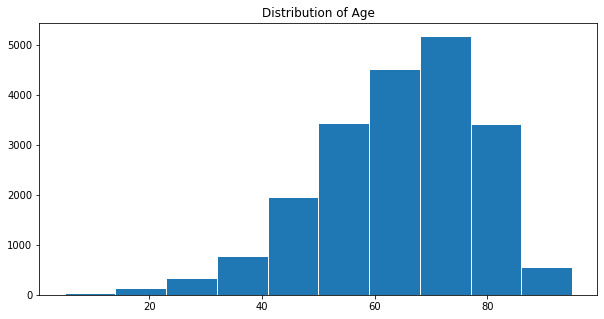

In [12]:
matplotlib.pyplot.figure(figsize = (10,5))
matplotlib.pyplot.hist(train["age"], edgecolor = "white")
matplotlib.pyplot.title("Distribution of Age")
matplotlib.pyplot.show()

As it is shown in the histogram, most of the patients are about 70 years of age. Young patients are not many.


A horizontal bar was used to visualize the relation between the number of lab procedures and different groups of ages. *Since the sample changes with each time of running the pipeline and the Satndard deviation of this feature is relatively high, each time we have different results.* That is why this part has been ommited. So are others that change because of different samplings.


It is good to check for correlation too. *heatmap* is a good choice. We send **corr()** function on the dataset to the heatmap and to see the measurement of it in numbers, we set the *annot* to true.

we need to change the size of the figure to a more suitable one for this plot.

<AxesSubplot:>

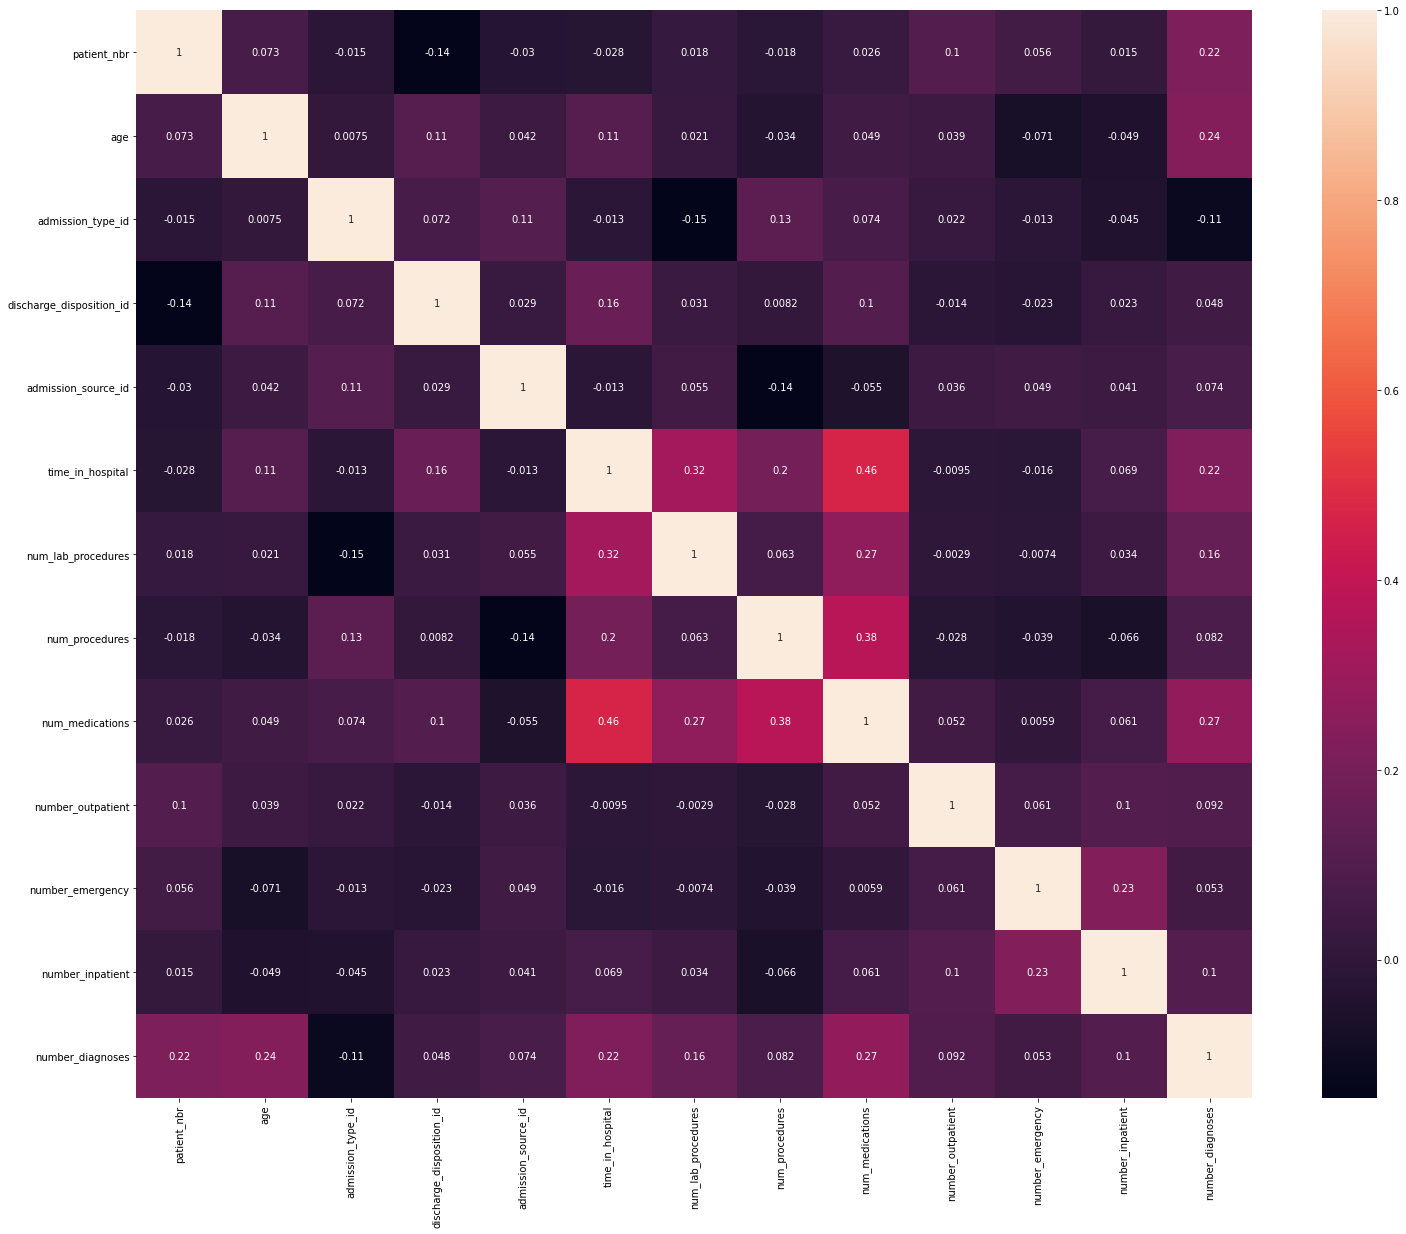

In [13]:
matplotlib.pyplot.figure(figsize = (25, 20))
seaborn.heatmap(train.corr(), annot = True)

The heatmap shows that there are not highly correlated features in the numeric values.

The most correlated features are **time in hospital** and **number of mediaction** but it is less than 50% and we take no action about it.

## Data Preprocessing

In [14]:
train.drop(["weight", 
            "medical_specialty", 
            "payer_code",
            "repaglinide",
            "nateglinide",
            "chlorpropamide",
            "acetohexamide",
            "tolbutamide",
            "acarbose",
            "miglitol",
            "troglitazone",
            "tolazamide",
            "examide",
            "citoglipton",
            "glyburide-metformin",
            "glipizide-metformin",
            "glimepiride-pioglitazone",
            "metformin-rosiglitazone",
            "metformin-pioglitazone"],
            axis = 1, inplace = True)


test.drop(["weight", 
           "medical_specialty", 
           "payer_code",
           "repaglinide",
           "nateglinide",
           "chlorpropamide", 
           "acetohexamide",
           "tolbutamide",
           "acarbose",
           "miglitol",
           "troglitazone",
           "tolazamide",
           "examide",
           "citoglipton",
           "glyburide-metformin",
           "glipizide-metformin",
           "glimepiride-pioglitazone",
           "metformin-rosiglitazone",
           "metformin-pioglitazone"],
           axis = 1, inplace = True)

print(train.shape)
print(test.shape)

(20352, 30)
(5089, 30)


We have reduced the features to **30**. Now we need to do some feature engineering.

------------------------------------------


## Feature Engineering

### Handling Missing Values
The columns that have missing values and we should replace them with the mode, have been introduced earlier.

As said before, we will fill the missing values of **race** and **diag_3** with the mode of them. And then we drop other few rows that contain missing values.

In [15]:
columns = ["race", "diag_3"]
fill_values = {"race": train["race"].mode, "diag_3": train["diag_3"].mode}   
train.fillna(value = fill_values)

train.dropna(inplace = True)
test.dropna(inplace = True)

train.shape

(19623, 30)

### Undersampling

The train set does not have an even target label for the training. Instead of oversampling we do undersampling, not genearting any artificial data, since we have a large dataset and the capacity of the hardware and software does not allow us to use all of the dataset.


First, we define **X** and **Y**.

In [16]:
train_x = train.drop("readmitted", axis = 1)
train_y = train["readmitted"]

test_x = test.drop("readmitted", axis = 1)
test_y = test["readmitted"]

print(f"shape of the x axis of train set: {train_x.shape}")
print(f"shape of the x axis of test set: {test_x.shape}")
print(f"shape of the y axis of train set: {train_y.shape}")
print(f"shape of the y axis of test set: {test_y.shape}")

shape of the x axis of train set: (19623, 29)
shape of the x axis of test set: (4899, 29)
shape of the y axis of train set: (19623,)
shape of the y axis of test set: (4899,)


In [17]:
train_y.value_counts()

NO     10566
>30     6993
<30     2064
Name: readmitted, dtype: int64

In [18]:
under_sampling = imblearn.under_sampling.RandomUnderSampler()
under_x, under_y = under_sampling.fit_resample(train_x, train_y)

print(f"the shape of train_x after undersampling is: {under_x.shape}")
print(f"the shape of train_y after undersampling is: {under_y.shape}")
print(f"number of values in the target label:\n{under_y.value_counts()}")

the shape of train_x after undersampling is: (6192, 29)
the shape of train_y after undersampling is: (6192,)
number of values in the target label:
<30    2064
>30    2064
NO     2064
Name: readmitted, dtype: int64


### Encoding Categorical Features


We need to encode the categorical features into numerical. Since this features are not ordered, we use One-Hot-Encoding. But, not all the features are categorical, so we use a **column transformer** class to do it only on categorical ones and with **passthrough** the rest will not be touched. with setting **sparse** to false, instead of a sparse matrix, it will return an array.


In [19]:
categorical_features = ["race",
                        "gender",
                        "diag_1",
                        "diag_2",
                        "diag_3",
                        "max_glu_serum",
                        "A1Cresult",
                        "metformin",
                        "glimepiride",
                        "glipizide",
                        "glyburide",
                        "pioglitazone",
                        "rosiglitazone",
                        "insulin",
                        "change",
                        "diabetesMed"]


categorical_transformer = sklearn.preprocessing.OneHotEncoder(sparse = False, handle_unknown = "ignore")

preprocessor = sklearn.compose.ColumnTransformer(
    transformers = [("categorical", categorical_transformer, categorical_features)],
    remainder = "passthrough"
)

train_one_hot = preprocessor.fit_transform(under_x)
test_one_hot = preprocessor.transform(test_x)

print(f"size of the train set after undersampling and encoding:{train_one_hot.shape}")
print(f"size of the test set after encoding:{test_one_hot.shape}")

size of the train set after undersampling and encoding:(6192, 1224)
size of the test set after encoding:(4899, 1224)


------------------------------


## Model Training

For this classification task, I have chosen **Random Forest**, **Stochastic Gradient Descent**, **Multi Layer Perceptron** and **Deep Neural Networks with Keras API**

### Random Forest

From the parameters of this model **criterion** which represents the mathematical quality of spliting, **n_estimators** which is for defining the number of trees, and **max_depth** that is for the depth of the trees, are used.

The scoring is **acuuracy**.

In [20]:
rf_parameters = {"criterion": ["gini", "entropy"],
                 "n_estimators" : range(50, 200, 25),
                 "max_depth" : range(2,5)}
random_forest_object = sklearn.ensemble.RandomForestClassifier()
random_forest_classifier = sklearn.model_selection.GridSearchCV(random_forest_object, 
                                                           rf_parameters, 
                                                           scoring = "accuracy",
                                                           cv = 5,
                                                           n_jobs = -1)
random_forest_classifier.fit(train_one_hot, under_y)

print(f"best accuracy of 'random forest' model is {random_forest_classifier.best_score_}")
print(f"best parameters for 'random forest' model is{random_forest_classifier.best_params_}")

best accuracy of 'random forest' model is 0.4360416251054514
best parameters for 'random forest' model is{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 150}


The accuracy is not high.

### Stochastic Gradient Descent


This is a linear classifier. **loss** parameter determines the linear model that will be used. **penalty** is for regularizatioin method, **n_iter_no_change** is for defining the number of iterations that we have no improvement and we wait before stopping.

In [21]:
g_parameters = {"loss" : ["log_loss", "hinge"], 
                "penalty" : ["l2", "l1"], 
                "n_iter_no_change" : range(5, 10)}
gradient = sklearn.linear_model.SGDClassifier()

sgradient_classifier = sklearn.model_selection.GridSearchCV(gradient, g_parameters, scoring = "accuracy", n_jobs = -1)

sgradient_classifier.fit(train_one_hot, under_y)

print(f"best score for Stochastic gradient descent is: {sgradient_classifier.best_score_}")
print(f"best parameters for Stochastic gradient descent are: {sgradient_classifier.best_params_}")

best score for Stochastic gradient descent is: 0.33349488422186324
best parameters for Stochastic gradient descent are: {'loss': 'log_loss', 'n_iter_no_change': 5, 'penalty': 'l1'}


The accuracy is low.

### Multi Layer Perceptron

This model is a simple neural network. The **activation** shows the activation function for the layers, **solver** is for optimizing the weights of the model, **batch_zise** defines the number of neurons in every mini batch, **max_iter** determines the maximum number of iterations.

In [22]:
ml_parameters = {"activation" : ["tanh", "relu"],
                 "solver" : ["adam", "sgd"],
                 "batch_size" : range(150, 300, 50),
                 "max_iter" : range(1000, 1200, 100)}
multi_layer_perceptron = sklearn.neural_network.MLPClassifier()

multi_layer_perceptron_classifier = sklearn.model_selection.GridSearchCV(multi_layer_perceptron,
                                                                         ml_parameters, 
                                                                         scoring = "accuracy", 
                                                                         n_jobs = -1)
multi_layer_perceptron_classifier.fit(train_one_hot, under_y)

print(f"best score is: {multi_layer_perceptron_classifier.best_score_}")
print(f"best parameters are: {multi_layer_perceptron_classifier.best_params_}")

best score is: 0.33349488422186324
best parameters are: {'activation': 'tanh', 'batch_size': 150, 'max_iter': 1000, 'solver': 'adam'}


The accuracy is still low.

### Deep Neural Network


For a deep neural network model there are a few APIs and here I used **Keras** library and since the data should be processed one after another, the **Sequential** model is used with different layers.


We need to define evaluation set to see the perfrmance of our model, since DNN doesn't do it by default. So we send the train set to the spliting function again.

In [23]:
train_xnn, evaluation_xnn, train_ynn, evaluation_ynn = sklearn.model_selection.train_test_split(train_one_hot, under_y)

print(f"shape of the train_x afetr undersampling was: {train_one_hot.shape}")
print(f"shape of the train_x for DNN is: {train_xnn.shape}")
print(f"shape of the train_y for DNN is: {train_ynn.shape}")
print(f"shape of the evaluation_x for DNN is: {evaluation_xnn.shape}")
print(f"shape of the evaluation_y for DNN is: {evaluation_ynn.shape}")

shape of the train_x afetr undersampling was: (6192, 1224)
shape of the train_x for DNN is: (4644, 1224)
shape of the train_y for DNN is: (4644,)
shape of the evaluation_x for DNN is: (1548, 1224)
shape of the evaluation_y for DNN is: (1548,)


Now we need to encode the target label to binary features for the modeling. this model can not handle categorical features. **keras** has a class **to_categorical** for this purpose. But it did not work since it could not be downloaded from the library. So I used *sklearn's* **LabelBinarizer** class instead.

In [24]:
train_ynn.unique()

array(['>30', 'NO', '<30'], dtype=object)

In [25]:
binarizer = sklearn.preprocessing.LabelBinarizer()
train_ynn_binarized = binarizer.fit_transform(pandas.DataFrame(train_ynn))
evaluation_ynn_binarized = binarizer.transform(evaluation_ynn)
print(binarizer.classes_)
train_ynn_binarized[34] # just an example to see if it has worked fine

['<30' '>30' 'NO']


array([0, 1, 0])

Now we have our target label ready for the training. The input dimention should be determined in the first layes which is a dense layer and it if the number of features we have in the train set.

The train set is now of type *array* so we need to set it to *dataframe* and then the length of the features can be found by chosing the *axes of 1*.

In [26]:
dimention = len(pandas.DataFrame(train_xnn).axes[1])
dimention

1224

Now we pass this size to the keras model. Teh first layer is better to have neurons more than the number of rows in the trainset. I ahve a total of four dense layers for hidden ones and one last dense layer with the size of the number of the targets we have. since the dataset is large I added *Dropout* layer to reduce the number and also trying to avoid overfitting. Then I also added layers to normalize the data. The last layer(ouput layer) has a *softmax* activation function to calculate the probability of belonging to the classes.

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10000, activation = "relu", input_dim = dimention))
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10000, activation = "relu"))
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10000, activation = "relu"))
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10000, activation = "relu"))
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(6000, activation = "relu"))
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(3000, activation = "relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1000, activation = "relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(500, activation = "relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(50, activation = "relu"))
model.add(keras.layers.Dense(3, activation = "softmax"))

2022-12-18 11:34:37.805158: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-18 11:34:37.805182: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-18 11:34:37.805198: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Ubuntu-1804-bionic-64-minimal): /proc/driver/nvidia/version does not exist
2022-12-18 11:34:37.805417: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


There is a warning, but it is not important. These warnings are due to installations and directories chosen, also the version of the library matters. "This is not an error, it is just telling you that it can and will take advantage of your CPU to get that extra speed out." ([Stack Over Flow website](https://stackoverflow.com/questions/65298241/what-does-this-tensorflow-message-mean-any-side-effect-was-the-installation-su), 2022)

Now after defining the architecture of the model we need to compile it and then fit it to the train set. For the compiler we need to define an optimizer, here *adam* is chosen, it is a multi calss classification so for the *loss* function *categorical-crossentropy* is chosen, and the metric is *accuracy*.

while fitting, I eventually set the batch sizes to 30 after trying a few different sizes, and number of epochs was chosen the same way.

In [28]:
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.fit(train_xnn, train_ynn_binarized, batch_size = 30, epochs = 10)

2022-12-18 11:34:48.309405: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
155/155 [==============================] - 69s 438ms/step - loss: 1.2698 - accuracy: 0.3491
Epoch 2/10
155/155 [==============================] - 67s 435ms/step - loss: 1.1515 - accuracy: 0.3630
Epoch 3/10
155/155 [==============================] - 74s 479ms/step - loss: 1.1502 - accuracy: 0.3508
Epoch 4/10
155/155 [==============================] - 69s 444ms/step - loss: 1.1497 - accuracy: 0.3590
Epoch 5/10
155/155 [==============================] - 74s 481ms/step - loss: 1.1371 - accuracy: 0.3600
Epoch 6/10
155/155 [==============================] - 82s 527ms/step - loss: 1.1397 - accuracy: 0.3555
Epoch 7/10
155/155 [==============================] - 72s 463ms/step - loss: 1.1475 - accuracy: 0.3568
Epoch 8/10
155/155 [==============================] - 73s 468ms/step - loss: 1.1244 - accuracy: 0.3527
Epoch 9/10
155/155 [==============================] - 72s 462ms/step - loss: 1.1099 - accuracy: 0.3605
Epoch 10/10
155/155 [==============================] - 72s 463ms/step - l

With the evaluation set that we defined we can now test the performance of the model. *verbose* is just for setting the option of how the progress will be shown. I set it to 1 to see an animated one.

In [29]:
test_loss, test_acc = model.evaluate(evaluation_xnn, evaluation_ynn_binarized, verbose = 1)
print(f"\nevaluation accuracy is: {test_acc}")

49/49 [==============================] - 3s 67ms/step - loss: 1.1346 - accuracy: 0.3766

evaluation accuracy is: 0.3766149878501892


Even though these models are known to be powerful, the accuracy is low. I tried many different levels and parameters to empower this neural network model. For instance, different activaton functions, batch sizes, adding and removing different layers. But still it was far from being good.

## Model Assessment

The best performance belongs to **Random Forest Classifier** model and it was not high enough. We should test how it works on the unseen dataset.

In [30]:
y_predicted = random_forest_classifier.predict(test_one_hot)

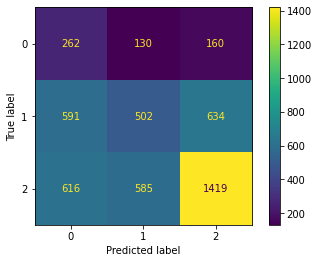

In [31]:
matrix_confusion = sklearn.metrics.confusion_matrix(test_y, y_predicted)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(matrix_confusion).plot()

In [32]:
f1 = sklearn.metrics.f1_score(test_y, y_predicted, average = None)
f1

array([0.25927759, 0.34103261, 0.58721291])

**f1** score with average set to *None* returns the score for each class, as we can see our predictions are not very accurate. Both these metrics show that one of the labels is classified better than the others. It might be due to a biased dataset.

In [33]:
accuracy = sklearn.metrics.accuracy_score(test_y, y_predicted)
accuracy

0.44560114309042664

## Conclusion


This datset is gathered in almost a decade from diabetic patients admitted in US hospitals. There are some limitations that this dataset has and causes low performance in the modeling. To name a few:

- The features could be chosen in a better way, most of them have too little divesity in values. Though I tried to get rid of some of them that had rare values that were different from the majority, it was not enough to get a better performance.
- Some of the features taht have been eliminated due to the problem I explained, are important measurements, but in the process of training, don't have much affection. I tried not to lose any of them in th efirst place, but the perfomance did not change at all with or without them.
- Some of the patients have been admitted and readmitted without indicating the first hospitalization. It could have been mentioned with a date column. This repeated accurances of the same patients can impact the quality of the training, due to the dependencies in the data.
- Ofcourse there is always a slight chance that something is not done in the best way during the pipeline that makes it imperfect.
- Some simple classification models could work better for this dataset.


Trying to improve the performance, I tried even not to perform over or under sampling and use other metrics for imbalanced data, but still the performance did not rise. Before having the problem of large dataset and using all the data points in my simpler classifiers than the neural network, The best performance was slightly over 60%. This shows that there is somthing missing in the dataset that could help us improve the performance.

I also tried to do feature importance, but the features are a lot for a figure. But even with that situation of the plot, The fetures that are in the ending part, were shown as important.

## References

- imbalanced learn website (2022) 'RandomUnderSampler'. Available at: https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler (Accessed: 12.12.2022)
- Keras website (2022) 'The sequential Model'. Available at: https://keras.io/guides/sequential_model/ (Accessed: 05.12.2022)
- matplotlib (2022) 'Pyplot tutorial'. Available at: https://matplotlib.org/stable/tutorials/introductory/pyplot.html (Accessed: 20.11.2022)
- Pandas website (2022) 'Pnadas User Guide'. Available at: https://pandas.pydata.org/docs/user_guide/index.html (Accessed: 11.12.2022)
- Renu Khandelwal (2022) 'Building Neural Network using Keras for Classification'. Available at: https://medium.datadriveninvestor.com/building-neural-network-using-keras-for-classification-3a3656c726c1 (Accessed: 07.12.2022)
- seaborn website (2022) 'seabrn.heatmap'. Available at: https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap (Accessed: 20.11.2022)
- scikit learn website (2022) 'sklearn.model_selection'. Available at: https://scikit-learn.org/stable/model_selection.html (Accessed: 17.11.2022)
- Stack Over Flow website (2022) Available at: https://stackoverflow.com/ (Accessed: 14.12.2022)
- UCI Machine Learning Repository (2022) 'Diabetes 130-US hospitals for years 1999-2008 Data Set'. Available at: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008 (Accessed: 04.11.2022)
 